# Association Rule Learning using the Apriori Algorithm

| Key              | Value                                                                                                                                                                                                                                                                                                        |
|:-----------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Course Codes** | BBT 4206 and BFS 4102                                                                                                                                                                                                                                                                                        |
| **Course Names** | BBT 4206: Business Intelligence II (Week 1-3 of 13) and<br/>BFS 4102: Advanced Business Data Analytics (Week 4-6 of 13)                                                                                                                                                                                      |
| **Semester**     | August to November 2025                                                                                                                                                                                                                                                                                      |
| **Lecturer**     | Allan Omondi                                                                                                                                                                                                                                                                                                 |
| **Contact**      | aomondi@strathmore.edu                                                                                                                                                                                                                                                                                       |
| **Note**         | The lecture contains both theory and practice.<br/>This notebook forms part of the practice.<br/>It is intended for educational purposes only.<br/>Recommended citation: [BibTex](https://raw.githubusercontent.com/course-files/ClusteringandAssociationRuleMining/refs/heads/main/RecommendedCitation.bib) |

**Business context:** A supermarket chain seeks to uncover frequent item combinations from historical transactions to improve product placement, plan promotions, and increase cross-selling.

**Dataset:** The **"groceries"** dataset by **Hahsler et al. (2011)** contains 9,835 market basket transactions. Each row in the dataset represents items in a customer's shopping cart.

## Step 1: Import the necessary libraries

**Purpose**: This chunk imports all the necessary libraries for data analysis, machine learning, and visualization.

1. **For File and system operations [urllib3](https://urllib3.readthedocs.io/en/stable/)**
    - `urllib.request` is used for opening and downloading data from URLs.
    - `from pathlib import Path` is used to handle file paths in a platform-independent way.
    - `os` provides functions for interacting with the operating system, such as file and directory management.

2. **For data manipulation - [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html):**
    - `pandas as pd`: For loading the dataset, creating and managing DataFrames, data manipulation and analysis using DataFrames

3. **For data preprocessing and transformation - [mlxtend](https://rasbt.github.io/mlxtend/)**
    - `TransactionEncoder`: Converts transaction data into a binary matrix format

4. **For association rule learning - [mlxtend](https://rasbt.github.io/mlxtend/)**
    - `apriori`: Implements the Apriori algorithm for finding frequent itemsets
    - `association_rules`: Generates rules from frequent itemsets

5. **For data visualization - [matplotlib](https://matplotlib.org/stable/gallery/index.html) and [seaborn](https://seaborn.pydata.org/examples/index.html)**
    - `matplotlib.pyplot as plt`: For basic plotting functionality
    - `seaborn as sns`: For enhanced statistical visualizations

6. **For suppressing warnings - [warnings](https://docs.python.org/3/library/warnings.html)**
    - `warnings`: Controls warning messages
    - `warnings.filterwarnings('ignore')`: Suppresses warning messages for cleaner output
    - Used to suppress warnings that may arise during the execution of the code. Even though it is not necessary for the code to run, it helps in keeping the output clean and focused on the results.

In [1]:
# For file and system operations
import urllib.request
from pathlib import Path
import os

# For data manipulation
import pandas as pd

# For data preprocessing and transformation
from mlxtend.preprocessing import TransactionEncoder

# For Association Rule Learning
from mlxtend.frequent_patterns import apriori, association_rules

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the data

1. **Data Loading Process**
    - Uses a context manager (`with` statement) for proper resource handling
    - Steps:
        1. Opens URL connection
        2. Reads binary content
        3. Decodes from bytes to UTF-8 string
        4. Splits into lines and processes each line

2. **Data Processing**
    - List comprehension transforms raw data into a structured format
    - Each transaction is processed by:
        - `strip()`: Removes whitespace
        - `split(',')`: Creates a list of items from comma-separated values

3. **Output**
    - Prints the total number of transactions
    - Shows the first three transactions as a sample


In [2]:
dataset_path = './data/groceries.csv'
url = 'https://github.com/course-files/ClusteringandAssociationRuleMining/raw/refs/heads/main/data/groceries.csv'

if not os.path.exists(dataset_path):
    print("Downloading dataset...")
    if not os.path.exists('./data'):
        os.makedirs('./data')
    urllib.request.urlretrieve(url, dataset_path)
    print("✅ Dataset downloaded")
else:
    print("✅ Dataset already exists locally")

path = Path(dataset_path)
content = path.read_text(encoding='utf-8')

transactions = []   # Start with an empty list

# Go through each line in the text
for line in content.splitlines():
    # Remove spaces and check if the line is not empty
    if line.strip():
        items = []  # Start a new shopping cart (list of items)

        # Go through each item in this line
        for item in line.split(","):
            # Remove spaces and ignore empty items
            if item.strip():
                items.append(item.strip())

        # Add this cleaned shopping cart to the transactions list
        transactions.append(items)

print(f"Total number of transactions: {len(transactions)}")
print("\nFirst three transactions:")
transactions[:3]

✅ Dataset already exists locally
Total number of transactions: 9835

First three transactions:


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk']]

## Step 3: Convert the transaction list into a one-hot encoded DataFrame

**Purpose:**

The purpose of this chunk is to format the transaction data correctly. This is essential for:
- Running the Apriori algorithm
- Computing association rules
- Analyzing item frequencies and relationships

1. **Transaction Encoder Initialization**
    - Creates a new `TransactionEncoder` object called `encoder`
    - Purpose: To convert transaction lists into a binary matrix format

2. **Fit and Transform Process**
    - `encoder.fit(transactions)`:
        - Learns all unique items across all transactions
        - Creates a mapping of items to columns

    - `transform(transactions)`:
        - Converts transactions into a binary matrix
        - Each row represents one transaction
        - Each column represents one item
        - Values: True/False indicating item presence

3. **DataFrame Creation**
    - Converts the binary matrix into a `pandas` DataFrame
    - Uses `encoder.columns_` to retrieve the column names
    - Each column name is a unique item
    - Each row shows items present (True) or absent (False)

4. **Data Preview**
    - `transaction_data.head()`: Shows first five rows of transformed data

**Example:**
If the original transactions were:
```
Transaction 1: ["milk", "bread"]
Transaction 2: ["bread", "butter"]
```
The transformed data would look like this:
```
   milk  bread  butter
0  True   True  False
1  False  True   True
```

In [3]:
encoder = TransactionEncoder()
onehot = encoder.fit(transactions).transform(transactions)
transaction_data = pd.DataFrame(onehot, columns=encoder.columns_)
transaction_data.head()

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   
1           False      False  False          False             False  False   
2           False      False  False          False             False  False   
3           False      False  False          False             False  False   
4           False      False  False          False             False  False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False    False    False               False   False        False   
1  ...   False    False    False               False   False        False   
2  ...   False    False    False               False   False        False   
3  ...   False    False    False               False   False        False   
4  ...   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False       False   False     False  
1       False       False    True     False  
2       False        True   False     False  
3       False       False    True     False  
4       False        True   False     False  

[5 rows x 169 columns]

## Step 4: Generate frequent `itemsets` using the Apriori algorithm

1. **Apriori Algorithm Application**
    - Function: `apriori()`
    - Parameters:
        - `transaction_data`: Binary encoded transaction matrix
        - `min_support=0.02`: Minimum support threshold (2%)
        - `use_colnames=True`: Use item names instead of indices

2. **Support Threshold**
    - Support(itemset X) = (number of transactions containing itemset X) / (total transactions)
    - 0.02 means itemset X must appear in at least 2% of transactions
    - Helps filter out rare combinations

3. **Result Generation**
    - Creates a DataFrame containing:
        - `itemsets`: Combinations of items
        - `support`: Frequency of occurrence

4. **Result Processing**
    - `sort_values(by='support', ascending=False)`: Orders by support value (highest first)
    - `head(10)`: Shows top 10 most frequent itemsets

In [4]:
frequent_itemsets = apriori(transaction_data, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head(10)

support            itemsets
57  0.255516        (whole milk)
39  0.193493  (other vegetables)
43  0.183935        (rolls/buns)
49  0.174377              (soda)
58  0.139502            (yogurt)
5   0.110524     (bottled water)
44  0.108998   (root vegetables)
53  0.104931    (tropical fruit)
47  0.098526     (shopping bags)
46  0.093950           (sausage)

## Step 5: Generate and display the association rules

1. **Rules Generation**
    - Function: `association_rules()`
    - Input: `frequent_itemsets` from Apriori algorithm
    - Parameters:
        - `metric='lift'`: A measure of how much more often items in the antecedent and the items in the consequent appear together in transactions compared to what would be expected if they were statistically independent.
        - `min_threshold=1.0`: Minimum lift value to include

2. **Rules and Key Metrics**
    - `antecedents`: "If" part of the rule (items in a basket)
    - `consequents`: "Then" part of the rule (likely additional items)
    - `support`: Frequency of items appearing together
    - `confidence`: Probability of consequent given antecedent
    - `lift`: Ratio of observed support to expected support

3. **Sorting and Display**
    - Sorts rules by confidence (highest first)
    - Shows the top 10 strongest associations
    - Displays most relevant columns for analysis

In [5]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

### Display the top 10 rules sorted by confidence

In [6]:
rules = rules.sort_values(by='confidence', ascending=False)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

antecedents         consequents   support  \
120           (yogurt, other vegetables)        (whole milk)  0.022267   
17                              (butter)        (whole milk)  0.027555   
24                                (curd)        (whole milk)  0.026131   
114  (other vegetables, root vegetables)        (whole milk)  0.023183   
116        (root vegetables, whole milk)  (other vegetables)  0.023183   
28                       (domestic eggs)        (whole milk)  0.029995   
108                 (whipped/sour cream)        (whole milk)  0.032232   
90                     (root vegetables)        (whole milk)  0.048907   
51                     (root vegetables)  (other vegetables)  0.047382   
33                   (frozen vegetables)        (whole milk)  0.020437   

     confidence      lift  
120    0.512881  2.007235  
17     0.497248  1.946053  
24     0.490458  1.919481  
114    0.489270  1.914833  
116    0.474012  2.449770  
28     0.472756  1.850203  
108    0.449645  1.759754  
90     0.448694  1.756031  
51     0.434701  2.246605  
33     0.424947  1.663094

### Display the top 10 rules sorted by lift and then confidence

In [7]:
rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

antecedents                     consequents   support  \
115  (other vegetables, whole milk)               (root vegetables)  0.023183   
118               (root vegetables)  (other vegetables, whole milk)  0.023183   
71                      (pip fruit)                (tropical fruit)  0.020437   
70                 (tropical fruit)                     (pip fruit)  0.020437   
116   (root vegetables, whole milk)              (other vegetables)  0.023183   
117              (other vegetables)   (root vegetables, whole milk)  0.023183   
50               (other vegetables)               (root vegetables)  0.047382   
51                (root vegetables)              (other vegetables)  0.047382   
122  (other vegetables, whole milk)                        (yogurt)  0.022267   
123                        (yogurt)  (other vegetables, whole milk)  0.022267   

     confidence      lift  
115    0.309783  2.842082  
118    0.212687  2.842082  
71     0.270161  2.574648  
70     0.194767  2.574648  
116    0.474012  2.449770  
117    0.119811  2.449770  
50     0.244877  2.246605  
51     0.434701  2.246605  
122    0.297554  2.132979  
123    0.159621  2.132979

### Filter the rules to show only those with high confidence and high lift

In [8]:
strong_rules = rules[
    (rules['confidence'] >= 0.2) &
    (rules['lift'] >= 2.0)
].sort_values(by='confidence', ascending=False)
strong_rules.head(15)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents                     consequents   support  \
120      (yogurt, other vegetables)                    (whole milk)  0.022267   
116   (root vegetables, whole milk)              (other vegetables)  0.023183   
51                (root vegetables)              (other vegetables)  0.047382   
58             (whipped/sour cream)              (other vegetables)  0.028876   
121            (yogurt, whole milk)              (other vegetables)  0.022267   
115  (other vegetables, whole milk)               (root vegetables)  0.023183   
122  (other vegetables, whole milk)                        (yogurt)  0.022267   
110            (whipped/sour cream)                        (yogurt)  0.020742   
106                (tropical fruit)                        (yogurt)  0.029283   
71                      (pip fruit)                (tropical fruit)  0.020437   
50               (other vegetables)               (root vegetables)  0.047382   
118               (root vegetables)  (other vegetables, whole milk)  0.023183   
107                        (yogurt)                (tropical fruit)  0.029283   

     confidence      lift  
120    0.512881  2.007235  
116    0.474012  2.449770  
51     0.434701  2.246605  
58     0.402837  2.081924  
121    0.397459  2.054131  
115    0.309783  2.842082  
122    0.297554  2.132979  
110    0.289362  2.074251  
106    0.279070  2.000475  
71     0.270161  2.574648  
50     0.244877  2.246605  
118    0.212687  2.842082  
107    0.209913  2.000475

## Step 6: Remove duplicate and redundant rules

In [9]:
def remove_duplicates(rules_df):
    rules_df = rules_df.sort_values(by=['lift', 'confidence'], ascending=[False, False]).reset_index(drop=True)
    unique_rules = []

    for i, row_i in rules_df.iterrows():
        is_redundant = False
        for j, row_j in enumerate(unique_rules):
            if row_i['consequents'] == row_j['consequents'] and row_i['antecedents'].issubset(row_j['antecedents']):
                is_redundant = True
                break

        if not is_redundant:
            unique_rules.append(row_i)

    return pd.DataFrame(unique_rules)

# Apply the function to the strong rules
nonredundant_rules = remove_duplicates(strong_rules)
nonredundant_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents                     consequents   support  \
0   (other vegetables, whole milk)               (root vegetables)  0.023183   
1                (root vegetables)  (other vegetables, whole milk)  0.023183   
2                      (pip fruit)                (tropical fruit)  0.020437   
3    (root vegetables, whole milk)              (other vegetables)  0.023183   
6   (other vegetables, whole milk)                        (yogurt)  0.022267   
7             (whipped/sour cream)              (other vegetables)  0.028876   
8             (whipped/sour cream)                        (yogurt)  0.020742   
9             (yogurt, whole milk)              (other vegetables)  0.022267   
10      (yogurt, other vegetables)                    (whole milk)  0.022267   
11                (tropical fruit)                        (yogurt)  0.029283   
12                        (yogurt)                (tropical fruit)  0.029283   

    confidence      lift  
0     0.309783  2.842082  
1     0.212687  2.842082  
2     0.270161  2.574648  
3     0.474012  2.449770  
6     0.297554  2.132979  
7     0.402837  2.081924  
8     0.289362  2.074251  
9     0.397459  2.054131  
10    0.512881  2.007235  
11    0.279070  2.000475  
12    0.209913  2.000475

In [10]:
rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

antecedents                     consequents   support  \
115  (other vegetables, whole milk)               (root vegetables)  0.023183   
118               (root vegetables)  (other vegetables, whole milk)  0.023183   
71                      (pip fruit)                (tropical fruit)  0.020437   
70                 (tropical fruit)                     (pip fruit)  0.020437   
116   (root vegetables, whole milk)              (other vegetables)  0.023183   
117              (other vegetables)   (root vegetables, whole milk)  0.023183   
50               (other vegetables)               (root vegetables)  0.047382   
51                (root vegetables)              (other vegetables)  0.047382   
122  (other vegetables, whole milk)                        (yogurt)  0.022267   
123                        (yogurt)  (other vegetables, whole milk)  0.022267   

     confidence      lift  
115    0.309783  2.842082  
118    0.212687  2.842082  
71     0.270161  2.574648  
70     0.194767  2.574648  
116    0.474012  2.449770  
117    0.119811  2.449770  
50     0.244877  2.246605  
51     0.434701  2.246605  
122    0.297554  2.132979  
123    0.159621  2.132979

In [11]:
# Eliminate bidirectional redundancy in rules
def remove_bidirectional_redundancy(rules_df):
    # Create a set to track unique antecedent-consequent pairs
    seen_rules = set()
    filtered_rules = []  # Store the final filtered rules

    for _, row in rules_df.iterrows():
        # Combine antecedents and consequents into a frozenset so the order doesn't matter
        rule_pair = frozenset([frozenset(row['antecedents']), frozenset(row['consequents'])])

        # Only keep the rule if it hasn't already been seen
        if rule_pair not in seen_rules:
            seen_rules.add(rule_pair)
            filtered_rules.append(row)

    return pd.DataFrame(filtered_rules)

# Apply the function to the strong rules
cleaned_rules = remove_bidirectional_redundancy(nonredundant_rules)
cleaned_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents         consequents   support  confidence  \
0   (other vegetables, whole milk)   (root vegetables)  0.023183    0.309783   
2                      (pip fruit)    (tropical fruit)  0.020437    0.270161   
3    (root vegetables, whole milk)  (other vegetables)  0.023183    0.474012   
6   (other vegetables, whole milk)            (yogurt)  0.022267    0.297554   
7             (whipped/sour cream)  (other vegetables)  0.028876    0.402837   
8             (whipped/sour cream)            (yogurt)  0.020742    0.289362   
9             (yogurt, whole milk)  (other vegetables)  0.022267    0.397459   
10      (yogurt, other vegetables)        (whole milk)  0.022267    0.512881   
11                (tropical fruit)            (yogurt)  0.029283    0.279070   

        lift  
0   2.842082  
2   2.574648  
3   2.449770  
6   2.132979  
7   2.081924  
8   2.074251  
9   2.054131  
10  2.007235  
11  2.000475

**List of Rules**

In [12]:
cleaned_rules = cleaned_rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
cleaned_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

antecedents         consequents   support  confidence  \
0   (other vegetables, whole milk)   (root vegetables)  0.023183    0.309783   
2                      (pip fruit)    (tropical fruit)  0.020437    0.270161   
3    (root vegetables, whole milk)  (other vegetables)  0.023183    0.474012   
6   (other vegetables, whole milk)            (yogurt)  0.022267    0.297554   
7             (whipped/sour cream)  (other vegetables)  0.028876    0.402837   
8             (whipped/sour cream)            (yogurt)  0.020742    0.289362   
9             (yogurt, whole milk)  (other vegetables)  0.022267    0.397459   
10      (yogurt, other vegetables)        (whole milk)  0.022267    0.512881   
11                (tropical fruit)            (yogurt)  0.029283    0.279070   

        lift  
0   2.842082  
2   2.574648  
3   2.449770  
6   2.132979  
7   2.081924  
8   2.074251  
9   2.054131  
10  2.007235  
11  2.000475

## Step 7: Save the rules as a CSV file

In [13]:
# Define the output path
output_path = './rule/top_rules_7b.csv'

# Ensure the data directory exists
if not os.path.exists('./rule'):
    os.makedirs('./rule')

# Save the top rules as a CSV file
cleaned_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10).to_csv(output_path, index=False)
print(f"\n✅ Top rules saved to {output_path}")

# Provide a download link if running in Google Colab
try:
    from google.colab import files
    files.download(output_path)
except ImportError:
    print("❌ Not running in Google Colab, skipped rule download link.")


✅ Top rules saved to ./rule/top_rules_7b.csv
❌ Not running in Google Colab, skipped rule download link.


## Step 8: Visualize rules

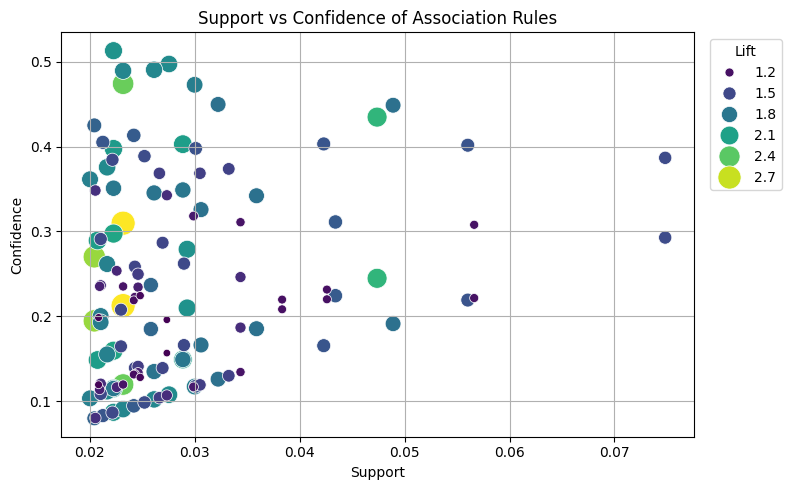

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(30, 300))
plt.title('Support vs Confidence of Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.legend(title='Lift', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.tight_layout()
plt.show()

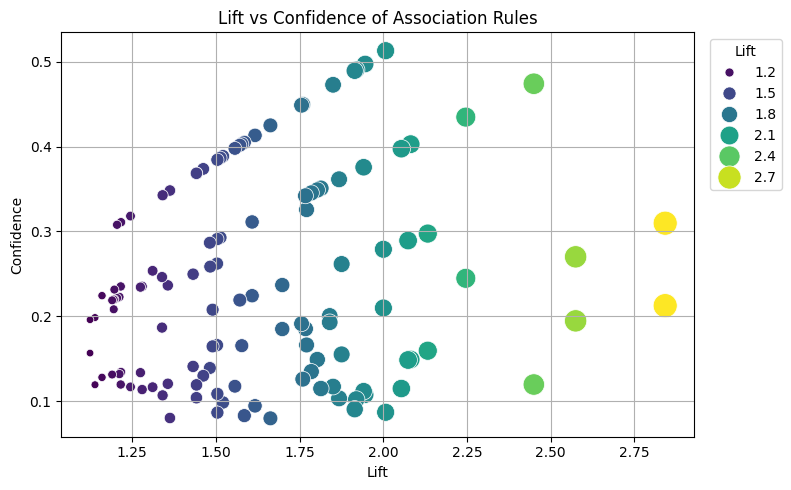

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rules, x='lift', y='confidence', size='lift', hue='lift', palette='viridis', sizes=(30, 300))
plt.title('Lift vs Confidence of Association Rules')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.grid(True)
plt.legend(title='Lift', bbox_to_anchor=(1.15, 1), loc='upper right')
plt.tight_layout()
plt.show()

# References
Hahsler, M., Chelluboina, S., Hornik, K., & Buchta, C. (2011). The arules R-Package Ecosystem: Analyzing Interesting Patterns from Large Transaction Datasets. Journal of Machine Learning Research, 12, 1977–1981.


# Lab Submission

## Student Details

**Name of the team on GitHub Classroom:**

**Team Member Contributions**

**Member 1**

| **Details**                                                                                        | **Comment** |
|:---------------------------------------------------------------------------------------------------|:------------|
| **Student ID**                                                                                     |             |
| **Name**                                                                                           |             |
| **What part of the lab did you personally contribute to,** <br>**and what did you learn from it?** |             |

**Member 2**

| **Details**                                                                                        | **Comment** |
|:---------------------------------------------------------------------------------------------------|:------------|
| **Student ID**                                                                                     |             |
| **Name**                                                                                           |             |
| **What part of the lab did you personally contribute to,** <br>**and what did you learn from it?** |             |

**Member 3**

| **Details**                                                                                        | **Comment** |
|:---------------------------------------------------------------------------------------------------|:------------|
| **Student ID**                                                                                     |             |
| **Name**                                                                                           |             |
| **What part of the lab did you personally contribute to,** <br>**and what did you learn from it?** |             |

**Member 4**

| **Details**                                                                                        | **Comment** |
|:---------------------------------------------------------------------------------------------------|:------------|
| **Student ID**                                                                                     |             |
| **Name**                                                                                           |             |
| **What part of the lab did you personally contribute to,** <br>**and what did you learn from it?** |             |

**Member 5**

| **Details**                                                                                        | **Comment** |
|:---------------------------------------------------------------------------------------------------|:------------|
| **Student ID**                                                                                     |             |
| **Name**                                                                                           |             |
| **What part of the lab did you personally contribute to,** <br>**and what did you learn from it?** |             |

## Instructions

You are working as a data analyst for a retail store. Using the association rules derived from the dataset (`cleaned_rules`), you are required to provide business recommendations and design a simple recommender function.

### Part 1: Business Analysis (Critical Thinking)

- Examine the association rules in `cleaned_rules`.
- Present a business analysis report that addresses:
  - Which rules are useful and actionable for the business? (e.g., cross-promotions, store layout, bundling strategies).
  - Which rules are misleading or not useful despite appearing strong? (Consider support, confidence, and lift).
  - Recommend two specific business actions the company should implement based on your findings.

### Part 2: Recommender System (Programming)

**Baseline (Required)**
- Create a function called `dynamic_recommender_baseline(cart, rules_df)` that:
  - Accepts a list of products in the client’s cart as the antecedent.
  - Searches `cleaned_rules` for matching antecedents.
  - Returns the consequent(s) as the recommendations.

**Intermediate (Recommended)**
- Extend your function by creating another one named `dynamic_recommender_intermediate(cart, rules_df)` that is extended to:
  - Handle multiple items in the shopping cart.
  - If no rule matches, return "No recommendation available."
  - Rank recommendations using confidence (highest first).

**Advanced (Optional Challenge)**
- Enhance your recommender by creating another function named `dynamic_recommender_advanced(cart, rules_df)` that is extended to:
  - Allowing the user to request top-N recommendations.
  - Incorporating lift to break ties between recommendations.
  - Comparing your recommender’s output to a naïve baseline (e.g., always recommend top-selling products).
  - Briefly discuss: When would association rule recommenders fail in real businesses?

### Deliverables

1. Business Analysis Report.
2. Python implementation of the `dynamic_recommender` function. State whether you completed the Baseline, Intermediate, or Advanced version.
3. Sample runs of your function showing different shopping carts and outputs.

### Grading Approach

- Baseline = Pass (implementation works, basic analysis) >= 60%
- Intermediate = Merit (handles edge cases, thoughtful analysis) 75–85%
- Advanced = Distinction (robust function, strategic business insights) >= 86%

**Note 1:** The real challenge is not building the function—it is deciding which rules actually matter for the business. A good analyst filters the noise, questions misleading correlations, and translates data into profitable actions.

**Note 2:** The sophistication of the recommender is not measured by code complexity, but by how well it handles real-world edge cases—like sparse data, missing rules, and ambiguous ties.

Reccommender  function 

In [16]:
import pandas as pd

def build_recommender(rules_df, min_conf=0.25, min_lift=1.1):
    # Ensure frozenset columns for easy matching
    rules_df = rules_df.copy()
    rules_df['antecedents'] = rules_df['antecedents'].apply(lambda x: frozenset(x))
    rules_df['consequents'] = rules_df['consequents'].apply(lambda x: frozenset(x))

    rules_df = rules_df[(rules_df['confidence'] >= min_conf) & (rules_df['lift'] >= min_lift)]
    rules_df = rules_df.sort_values(['confidence','lift','support'], ascending=False)

    def recommend(basket, k=5):
        basket = frozenset(basket)
        candidates = []

        for _, r in rules_df.iterrows():
            ant, cons = r['antecedents'], r['consequents']
            if ant.issubset(basket):
                for item in cons:
                    if item not in basket:
                        candidates.append((item, r['confidence'], r['lift'], r['support']))

        if not candidates:
            return pd.DataFrame(columns=['item','confidence','lift','support'])

        recs = (pd.DataFrame(candidates, columns=['item','confidence','lift','support'])
                  .groupby('item', as_index=False)
                  .agg({'confidence':'max','lift':'max','support':'max'})
                  .sort_values(['confidence','lift','support'], ascending=False)
                  .head(k))
        return recs

    return recommend

# Example usage:
# rec = build_recommender(top_rules)
# rec(['whole milk', 'yogurt', 'bread'], k=5)
